In [1]:
#Importando as bibliotecas
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#1-Preparação dos dados
#Importando a base de dados
data = pd.read_csv('dadosacoes.csv')

In [3]:
#Verificando os dados da base de dados
data.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [4]:
#2- Exploração dos dados
#Criando o dataframe
df_investimentos = pd.DataFrame(data)

In [5]:
df_investimentos # Exibe os valores

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975
...,...,...,...,...
95,SUZB3,208,78,3035
96,VALE3,253,60,3263
97,GOOGLE,99,35,980
98,VALE3,82,43,1866


In [6]:
df_investimentos.info() #exibe informações sobre o novo dataframe criado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [7]:
#Vendo as informações do dataframe
df_investimentos.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


Text(0.5, 1.0, 'Nome da ação X preço da ação')

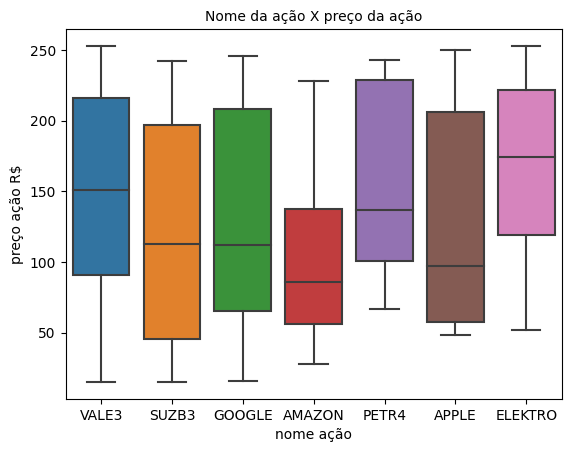

In [13]:
sns.boxplot(x= df_investimentos['nome ação'],y= df_investimentos['preço ação R$'])
plt.title("Nome da ação X preço da ação", fontsize=10)

Text(0.5, 1.0, 'Nome da ação X valor de mercado')

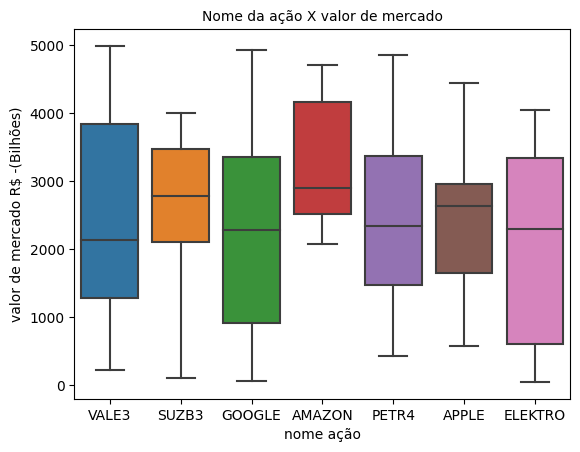

In [14]:
sns.boxplot(x= df_investimentos['nome ação'],y= df_investimentos['valor de mercado R$ -(Bilhões)'])
plt.title("Nome da ação X valor de mercado", fontsize=10)